# Deep Learning Model Evaluations

In [1]:
import sys
sys.path.insert(0, '../../')
from library.notebook_api.deep_learning_training_data import get_feature_vector_data,get_augmented_x_y
from library.notebook_api.model_evaluation import ModelEvaluation,ModelEvaluationComparisons
from configuration import SAVED_MODEL_PATH

2024-12-08 10:25:44.218664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Data and Model Evaluations for CNN + MFCC Scenarios

In [ ]:
_, X_test, _, y_test,label_encoder =get_feature_vector_data(vector_type = 'mfcc',
                                                        version_string = '006',
                                                        vector_length = 500, 
                                                        apply_normalization = True,
                                                        apply_resampling=False)
mfcc_model_1 = ModelEvaluation('CNN_MFCC',
                'v6b_mfcc_scaled_128_22500_500_cnn_2d_128_batch_50_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )


#can use same data as resampling happens just on training data 
mfcc_model_2 = ModelEvaluation('CNN_MFCC_RandomOverSampler',
                'v6c_mfcc_scaled_resampled_128_22500_500_cnn_2d_128_batch_200_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )


_, X_test, _, y_test,label_encoder =get_feature_vector_data(vector_type = 'mfcc',
                                                        version_string = '006',
                                                        vector_length = 1000, 
                                                        apply_normalization = True,
                                                        apply_resampling=False)

#augmentation scenario eval, currrently also augments test data to put to same shape and label distribution
X_test, y_test  = get_augmented_x_y(X_test, 
                                    y_test, 
                                    num_segments=5, 
                                    overlap_factor=.3,
                                    row_resample_weight_100_perc_thresh=.9,
                                    discount_weight_factor=.25
                                    )

#can use same data as resampling happens just on training data 
mfcc_model_3 = ModelEvaluation('CNN_MFCC_Segmented',
                'v6c_mfcc_scaled_segmentresampled53_128_22500_1000_cnn_2d_128_batch_200_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )

_ = None
_ = None

Loading mfcc vectors
features shape distribution
1099    20865
1         221
293         2
173         2
862         2
392         1
467         1
201         1
946         1
622         1
Name: count, dtype: int64
total records:  21164
normalized length:  20907
Row Count after label based filter:  21164
Final Row count after label and feature filter:  20907
Unique label count:  6
label data count  20907
Truncate features to consistent length and reshape
Generate train_test_split for test size  0.2
applying normalization
131/131 [==============================] - 5s 37ms/step
Loading mfcc vectors
features shape distribution
1099    20865
1         221
293         2
173         2
862         2
392         1
467         1
201         1
946         1
622         1
Name: count, dtype: int64
total records:  21164
normalized length:  20871
Row Count after label based filter:  21164
Final Row count after label and feature filter:  20871
Unique label count:  6
label data count  20871
Truncate 

ValueError: in user code:

    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/murphybre/Desktop/UMichigan/Fall2024/siads699_capstone/music_modeling_capstone/.venv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 162, 13, 1), found shape=(None, 215, 13, 1)


In [ ]:
    
comp = ModelEvaluationComparisons([mfcc_model_1,mfcc_model_2, mfcc_model_3])
    

In [7]:
comp.display_metric_comparison_chart(comp.metrics[0]) 

alt.Chart(...)

In [8]:
comp.display_metric_comparison_chart(comp.metrics[1])

alt.Chart(...)

In [9]:
comp.display_metric_comparison_chart(comp.metrics[2])

alt.Chart(...)

Evaluating Model:  CNN_MFCC
131/131 - 4s - loss: 0.7260 - accuracy: 0.7511 - 4s/epoch - 34ms/step

Test Accuracy: 75.11%
Test Loss: 0.7260

Classification Report:
              precision    recall  f1-score   support

   classical       0.85      0.80      0.83       263
     country       0.53      0.15      0.24        59
  electronic       0.68      0.82      0.74      1315
      hiphop       0.91      0.43      0.58       724
        jazz       0.54      0.32      0.40       134
        rock       0.78      0.88      0.83      1687

    accuracy                           0.75      4182
   macro avg       0.71      0.57      0.60      4182
weighted avg       0.76      0.75      0.74      4182



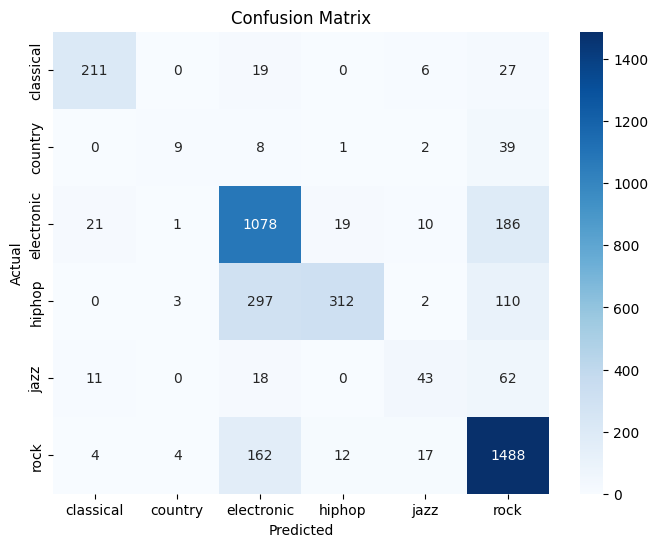

Evaluating Model:  CNN_MFCC_resampled
131/131 - 4s - loss: 0.7202 - accuracy: 0.7544 - 4s/epoch - 31ms/step

Test Accuracy: 75.44%
Test Loss: 0.7202

Classification Report:
              precision    recall  f1-score   support

   classical       0.84      0.85      0.85       263
     country       0.44      0.81      0.57        59
  electronic       0.72      0.78      0.75      1315
      hiphop       0.82      0.63      0.71       724
        jazz       0.36      0.69      0.47       134
        rock       0.84      0.78      0.81      1687

    accuracy                           0.75      4182
   macro avg       0.67      0.76      0.69      4182
weighted avg       0.78      0.75      0.76      4182



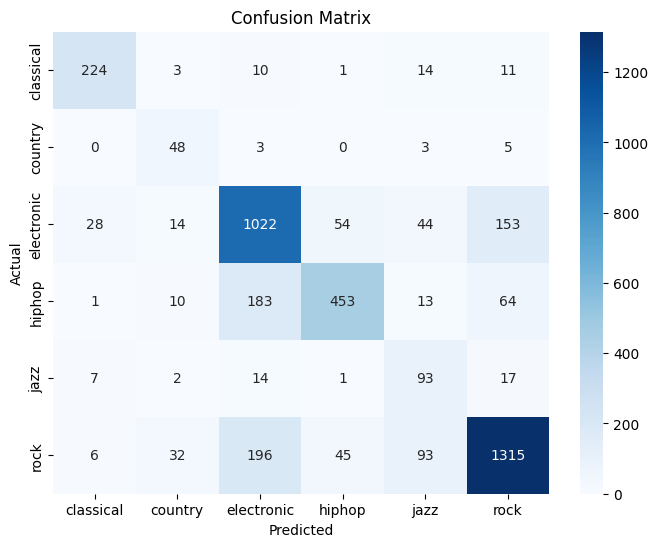

(None, None)

In [4]:
mfcc_model_1.evaluate(), mfcc_model_2.evaluate()